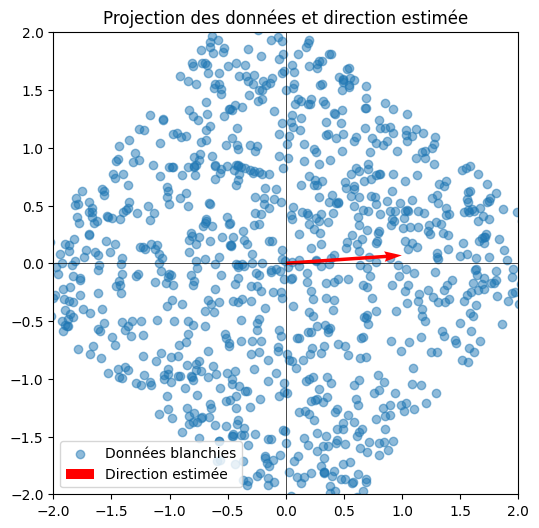

Vecteur estimé : [0.99763866 0.06868119]


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def kurtosis(y):
    return np.mean(y**4) - 3 * (np.mean(y**2))**2  # par définition kurt(Y)=E[Y^4]−3(E[Y^2])^2
 

def fastICA_kurtosis(Z, q_init, epsilon=1e-6, max_iter=1000):
    q = q_init / np.linalg.norm(q_init)  # Normalisation initiale de q
    for _ in range(max_iter):
        Y = np.dot(q.T,Z) #  Y = q(T).Z par définition de Y
        q_new = (np.dot(Z,(Y**3).T) / Z.shape[0]) - 3*q  # Application la méthode de fast ICA avec q_new = q^(k+1) = E[Y^3 . Z] - 3 * q et E[Y^3 . Z] mais en pratique = la somme des Z.(Yi)^3(T) / n=Z.shape[0] qui est le nombre d'échantillons
        q_new /= np.linalg.norm(q_new)  # Normalisation
        
        if 1 - np.abs(np.dot(q_new, q)) < epsilon:
            break  # Critère d'arrêt satisfait
        q = q_new
    return q

# Paramètres
epsilon = 1e-6
p = 2
A = np.array([[1, 2], [4, 3]])

# Génération des sources indépendantes S avec 1000 observations par exemples
S1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 1000)
S2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), 1000)
S = np.vstack((S1, S2)) # empile les vecteurs S1 et S2 en lignes pour créer une matrice de taille (2,1000)

# Mélange des sources
X = np.dot(A, S) # X de taille (2,n=1000)

# Blanchiment des données
X_mean = np.mean(X, axis=1, keepdims=True)  # on a besoin de soustraire la moyenne de chaque variable (chaque ligne) individuellement d'où le axis =1  et X_mean devient de taille (p, 1) donc matrice colonne au lieu de (p,) qui est un vecteur 1D d'où le keepdim=True
X_centered = X - X_mean         #centrage de X
cov_X = np.cov(X_centered)      # calcul de la covarience de X
D, E = np.linalg.eigh(cov_X)    #np.linalg.eigh(cov_X) effectue une décomposition en valeurs propres avec E la matrice de vecteurs propres et D un vecteur contenant les valeurs propres associées sachant que Cov(X)=E*D*E.T 
Z = np.dot(np.diag(1.0 / np.sqrt(D)), np.dot(E.T, X_centered))  # Données blanchies car blanchiment = centrage + projection sur les vecteurs propres + normalisation par les variances pour obtenir des données décorrélées et normalisées autrement dit poser Z = D^(-1/2)*E.T*X et on a bien cov(Z) = I

# Explication:
#1 En multipliant X centered par E.T on projette les données sur la base des vecteurs propres
#2 np.diag(1.0 / np.sqrt(D)) crée une matrice diagonale où chaque valeur est 1/sqrt(lambda(i))

# Initialisation du vecteur q_init et calcul de q_est via la fonction fastICA_kurtosis
q_init = np.random.randn(p)
q_est = fastICA_kurtosis(Z, q_init, epsilon)

# Affichage des données et du vecteur estimé
plt.figure(figsize=(6, 6))
plt.scatter(Z[0, :], Z[1, :], alpha=0.5, label="Données blanchies")
plt.quiver(0, 0, q_est[0], q_est[1], angles='xy', scale_units='xy', scale=1, color='r', label="Direction estimée")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.title("Projection des données et direction estimée")
plt.show()

print("Vecteur estimé :", q_est)